In [ ]:
# Read dataset
import pandas as pd
df = pd.read_csv("porto.csv")

In [ ]:
# Turn Timestamp column data from UNIX to DATETIME format

df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"], unit="s", errors="coerce", utc=True)
print(df["TIMESTAMP"].dtype)
print(df["TIMESTAMP"].head())


datetime64[ns, UTC]
0   2013-07-01 00:00:58+00:00
1   2013-07-01 00:08:23+00:00
2   2013-07-01 00:02:31+00:00
3   2013-07-01 00:00:54+00:00
4   2013-07-01 00:04:51+00:00
Name: TIMESTAMP, dtype: datetime64[ns, UTC]


In [24]:
df.head(20)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,2013-07-01 00:00:58+00:00,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,2013-07-01 00:08:23+00:00,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,2013-07-01 00:02:31+00:00,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,2013-07-01 00:00:54+00:00,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,2013-07-01 00:04:51+00:00,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
5,1372636965620000231,C,NaN,NaN,20000231,2013-07-01 00:02:45+00:00,A,False,"[[-8.615502,41.140674],[-8.614854,41.140926],[..."
6,1372637210620000456,C,NaN,NaN,20000456,2013-07-01 00:06:50+00:00,A,False,"[[-8.57952,41.145948],[-8.580942,41.145039],[-..."
7,1372637299620000011,C,NaN,NaN,20000011,2013-07-01 00:08:19+00:00,A,False,"[[-8.617563,41.146182],[-8.617527,41.145849],[..."
8,1372637274620000403,C,NaN,NaN,20000403,2013-07-01 00:07:54+00:00,A,False,"[[-8.611794,41.140557],[-8.611785,41.140575],[..."
9,1372637905620000320,C,NaN,NaN,20000320,2013-07-01 00:18:25+00:00,A,False,"[[-8.615907,41.140557],[-8.614449,41.141088],[..."


In [ ]:
print(f"Number of taxi trips: {len(df)}")


Number of taxi trips: 1710670


In [ ]:
print(f"Unique taxis (by TAXI_ID): {df['TAXI_ID'].nunique()}")


Unique taxis (by TAXI_ID): 448


In [ ]:
allowed = {"A", "B", "C"}
col = df["CALL_TYPE"]

unique_vals = set(col.dropna().unique())
invalid_vals = sorted(unique_vals - allowed)
missing_count = col.isna().sum()

if invalid_vals or missing_count > 0:
    print("CALL_TYPE validation issues detected:")
    if invalid_vals:
        print(f" - Unexpected values: {invalid_vals}")
    if missing_count > 0:
        print(f" - Missing (NaN) values: {missing_count}")
else:
    print("CALL_TYPE contains only expected values A, B, C and no missing values.")

counts = col.value_counts(dropna=False)
print("\nCounts by CALL_TYPE (including NaN):")
print(counts)


CALL_TYPE contains only expected values A, B, C and no missing values.

Counts by CALL_TYPE (including NaN):
CALL_TYPE
B    817881
C    528019
A    364770
Name: count, dtype: int64


Timespan: 2013-07-01 00:00:00+00:00  →  2014-06-30 00:00:00+00:00


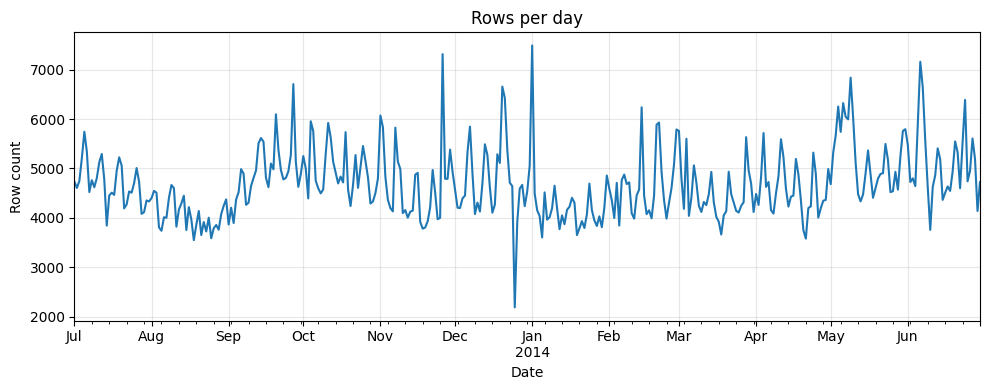

In [ ]:
import matplotlib.pyplot as plt

# Choose the datetime column (prefer local if available)
ts_col = "TIMESTAMP_local" if "TIMESTAMP_local" in df.columns else "TIMESTAMP"

# Resample to daily counts (adjust 'D' to 'H' for hourly if needed)
counts_per_day = (
    df.set_index(ts_col)
      .assign(_one=1)["_one"]
      .resample("D")
      .sum()
)

print(f"Timespan: {counts_per_day.index.min()}  →  {counts_per_day.index.max()}")

fig, ax = plt.subplots(figsize=(10, 4))
counts_per_day.plot(ax=ax)
ax.set_title("Rows per day")
ax.set_xlabel("Date")
ax.set_ylabel("Row count")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
subset = df.loc[df["CALL_TYPE"] == "B", "ORIGIN_STAND"]
num_stands = subset.dropna().nunique()
print(f"Distinct taxi stands (ORIGIN_STAND where CALL_TYPE='B'): {num_stands}")


Distinct taxi stands (ORIGIN_STAND where CALL_TYPE='B'): 63


In [ ]:
print("Column dtypes:")
print(df.dtypes)
print()
print("DataFrame info:")
df.info()


Column dtypes:
TRIP_ID                       int64
CALL_TYPE                    object
ORIGIN_CALL                 float64
ORIGIN_STAND                float64
TAXI_ID                       int64
TIMESTAMP       datetime64[ns, UTC]
DAY_TYPE                     object
MISSING_DATA                   bool
POLYLINE                     object
dtype: object

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710670 entries, 0 to 1710669
Data columns (total 9 columns):
 #   Column        Dtype              
---  ------        -----              
 0   TRIP_ID       int64              
 1   CALL_TYPE     object             
 2   ORIGIN_CALL   float64            
 3   ORIGIN_STAND  float64            
 4   TAXI_ID       int64              
 5   TIMESTAMP     datetime64[ns, UTC]
 6   DAY_TYPE      object             
 7   MISSING_DATA  bool               
 8   POLYLINE      object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), int64(2), object(3)
memory usage: 10

In [26]:
import ast
import numpy as np
import pandas as pd
from pandas.api.types import is_bool_dtype, is_integer_dtype, is_datetime64tz_dtype

issues = []

def add_issue(name, mask, sample_cols=None, max_examples=5):
    count = int(mask.sum())
    if count == 0:
        return
    ex = df.loc[mask, sample_cols].head(max_examples) if sample_cols else df.loc[mask].head(max_examples)
    issues.append((name, count, ex))

# 1) TRIP_ID: int64 and 19-digit identifier
trip_col = df.get("TRIP_ID")
if trip_col is None:
    print("Column TRIP_ID missing")
else:
    # dtype check
    if not is_integer_dtype(trip_col):
        add_issue("TRIP_ID not integer dtype", ~trip_col.isna(), ["TRIP_ID"])
    # 19-digit check (ignore NaNs)
    trip_str_len = trip_col.dropna().astype(np.int64).astype(str).str.len()
    bad_len_mask = trip_col.notna()
    bad_len_mask.loc[trip_col.notna()] = trip_str_len != 19
    add_issue("TRIP_ID not 19 digits", bad_len_mask.fillna(False), ["TRIP_ID"])

# 2) CALL_TYPE: must be in {A,B,C}
allowed_call = {"A", "B", "C"}
call_col = df.get("CALL_TYPE")
if call_col is None:
    print("Column CALL_TYPE missing")
else:
    invalid_call = call_col.dropna().astype(str).str.upper().isin(allowed_call) == False
    add_issue("CALL_TYPE has unexpected values", call_col.notna() & invalid_call, ["CALL_TYPE"])
    add_issue("CALL_TYPE is missing", call_col.isna(), ["CALL_TYPE"])

# 3) ORIGIN_CALL: numeric only when CALL_TYPE == 'A'; else should be NaN
oc = df.get("ORIGIN_CALL")
if oc is None:
    print("Column ORIGIN_CALL missing")
else:
    is_A = call_col.astype(str).str.upper().eq("A") if call_col is not None else pd.Series(False, index=df.index)
    # When A, should be non-null
    add_issue("ORIGIN_CALL missing when CALL_TYPE='A'", is_A & oc.isna(), ["CALL_TYPE", "ORIGIN_CALL"])
    # When not A, should be null
    add_issue("ORIGIN_CALL present when CALL_TYPE!='A'", (~is_A) & oc.notna(), ["CALL_TYPE", "ORIGIN_CALL"])

# 4) ORIGIN_STAND: numeric only when CALL_TYPE == 'B'; else should be NaN
os_ = df.get("ORIGIN_STAND")
if os_ is None:
    print("Column ORIGIN_STAND missing")
else:
    is_B = call_col.astype(str).str.upper().eq("B") if call_col is not None else pd.Series(False, index=df.index)
    add_issue("ORIGIN_STAND missing when CALL_TYPE='B'", is_B & os_.isna(), ["CALL_TYPE", "ORIGIN_STAND"])
    add_issue("ORIGIN_STAND present when CALL_TYPE!='B'", (~is_B) & os_.notna(), ["CALL_TYPE", "ORIGIN_STAND"])

# 5) TAXI_ID: integer-like, non-missing
taxi = df.get("TAXI_ID")
if taxi is None:
    print("Column TAXI_ID missing")
else:
    add_issue("TAXI_ID is missing", taxi.isna(), ["TAXI_ID"])
    if not is_integer_dtype(taxi):
        add_issue("TAXI_ID not integer dtype", taxi.notna(), ["TAXI_ID"])

# 6) TIMESTAMP: timezone-aware datetime in UTC
ts = df.get("TIMESTAMP")
if ts is None:
    print("Column TIMESTAMP missing")
else:
    ok_tz = is_datetime64tz_dtype(ts) and (getattr(getattr(ts, "dt", None), "tz", None) is not None) and (ts.dt.tz.tzname(None) in ("UTC", "Coordinated Universal Time"))
    if not ok_tz:
        add_issue("TIMESTAMP not timezone-aware UTC datetime", ts.notna(), ["TIMESTAMP"])

# 7) DAY_TYPE: must be in {A,B,C}
allowed_day = {"A", "B", "C"}
day = df.get("DAY_TYPE")
if day is None:
    print("Column DAY_TYPE missing")
else:
    invalid_day = day.dropna().astype(str).str.upper().isin(allowed_day) == False
    add_issue("DAY_TYPE has unexpected values", day.notna() & invalid_day, ["DAY_TYPE"])
    add_issue("DAY_TYPE is missing", day.isna(), ["DAY_TYPE"])

# 8) MISSING_DATA: strictly boolean
md = df.get("MISSING_DATA")
if md is None:
    print("Column MISSING_DATA missing")
else:
    # Accept both bool dtype or string TRUE/FALSE that can coerce to bool
    if is_bool_dtype(md):
        bad_md = md.isna()
    else:
        upper = md.astype(str).str.upper()
        bad_md = ~upper.isin(["TRUE", "FALSE"]) & md.notna()
    add_issue("MISSING_DATA not boolean or missing", bad_md, ["MISSING_DATA"])

# 9) POLYLINE: parseable list of [lon, lat] pairs
poly = df.get("POLYLINE")
if poly is None:
    print("Column POLYLINE missing")
else:
    def check_polyline(val):
        if pd.isna(val):
            return False  # treat NaN as issue handled below if needed
        try:
            parsed = val if isinstance(val, (list, tuple)) else ast.literal_eval(val)
        except Exception:
            return True  # parse failure
        if not isinstance(parsed, (list, tuple)):
            return True
        for pt in parsed:
            if not (isinstance(pt, (list, tuple)) and len(pt) == 2 and all(isinstance(x, (int, float)) for x in pt)):
                return True
        return False  # no issue
    poly_issue_mask = poly.apply(check_polyline)
    add_issue("POLYLINE not a valid list of [lon, lat] pairs", poly_issue_mask, ["POLYLINE"])

# Print summary
if not issues:
    print("All column checks passed. No issues found.")
else:
    total_rows_with_issues = int(pd.concat([df.index.to_series()[m] for _, m in [(n, df.index.isin(df.loc[mask].index)) for n, _, ex in issues] for mask in [df.index.isin(ex.index)]]).nunique()) if len(issues) > 0 else 0
    print(f"Found {sum(c for _, c, _ in issues)} issues across checks.")
    for name, count, ex in issues:
        print(f"\n{name}: {count}")
        display(ex)



/var/folders/wx/mxtcgny559v2541yx33fyl680000gn/T/ipykernel_4812/3291242584.py:73: DeprecationWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  ok_tz = is_datetime64tz_dtype(ts) and (getattr(getattr(ts, "dt", None), "tz", None) is not None) and (ts.dt.tz.tzname(None) in ("UTC", "Coordinated Universal Time"))


KeyboardInterrupt: 

In [ ]:
missing_col = df["MISSING_DATA"]
true_mask = (missing_col == True) | (missing_col.astype(str).str.upper() == "TRUE")
count_missing = int(true_mask.sum())
print(f"Trips with missing data: {count_missing} ({count_missing/len(df):.2%})")


Trips with missing data: 10 (0.00%)


In [29]:
import numpy as np
import pandas as pd

print("Fast validation summary (vectorized)\n" + "-"*40)

# Helpers
call = df.get("CALL_TYPE")
day = df.get("DAY_TYPE")
trip = df.get("TRIP_ID")
origin_call = df.get("ORIGIN_CALL")
origin_stand = df.get("ORIGIN_STAND")
taxi = df.get("TAXI_ID")
ts = df.get("TIMESTAMP")
md = df.get("MISSING_DATA")
poly = df.get("POLYLINE")

# Precompute uppercase once (vectorized)
call_upper = call.astype("string").str.upper() if call is not None else None
day_upper = day.astype("string").str.upper() if day is not None else None

# 1) TRIP_ID: int64 and 19 digits via numeric range check
if trip is None:
    print("TRIP_ID: MISSING column")
else:
    is_int64 = str(trip.dtype) == "int64"
print(f"TRIP_ID dtype int64: {is_int64}")
# Only check non-null
if is_int64:
    good_len_mask = (trip >= 10**18) & (trip <= 10**19 - 1)
    bad_len = int(((~trip.isna()) & (~good_len_mask)).sum())
    print(f"TRIP_ID with non-19-digit values: {bad_len}")
else:
    print("TRIP_ID length check skipped (non-int dtype)")

# 2) CALL_TYPE in {A,B,C}
if call is None:
    print("CALL_TYPE: MISSING column")
else:
    allowed = {"A", "B", "C"}
    invalid = int((call_upper.notna().fillna(False) & ~call_upper.isin(list(allowed))).sum())
    missing = int(call.isna().sum())
    print(f"CALL_TYPE invalid: {invalid}, missing: {missing}")

# 3) ORIGIN_CALL rules (only set when A)
if origin_call is None:
    print("ORIGIN_CALL: MISSING column")
else:
    is_A = call_upper.eq("A") if call_upper is not None else pd.Series(False, index=df.index)
    missing_when_A = int(((is_A) & origin_call.isna()).sum())
    present_when_not_A = int(((~is_A) & origin_call.notna()).sum())
    print(f"ORIGIN_CALL missing when A: {missing_when_A}; present when not A: {present_when_not_A}")

# 4) ORIGIN_STAND rules (only set when B)
if origin_stand is None:
    print("ORIGIN_STAND: MISSING column")
else:
    is_B = call_upper.eq("B") if call_upper is not None else pd.Series(False, index=df.index)
    missing_when_B = int(((is_B) & origin_stand.isna()).sum())
    present_when_not_B = int(((~is_B) & origin_stand.notna()).sum())
    print(f"ORIGIN_STAND missing when B: {missing_when_B}; present when not B: {present_when_not_B}")

# 5) TAXI_ID present and integer-like
if taxi is None:
    print("TAXI_ID: MISSING column")
else:
    missing_taxi = int(taxi.isna().sum())
    print(f"TAXI_ID missing: {missing_taxi}; dtype: {taxi.dtype}")

# 6) TIMESTAMP dtype check
if ts is None:
    print("TIMESTAMP: MISSING column")
else:
    print(f"TIMESTAMP dtype: {ts.dtype}; is UTC tz-aware: {str(ts.dtype).endswith(', UTC]')}")

# 7) DAY_TYPE in {A,B,C}
if day is None:
    print("DAY_TYPE: MISSING column")
else:
    allowed_day = {"A", "B", "C"}
    invalid_day = int((day_upper.notna().fillna(False) & ~day_upper.isin(list(allowed_day))).sum())
    missing_day = int(day.isna().sum())
    print(f"DAY_TYPE invalid: {invalid_day}, missing: {missing_day}")

# 8) MISSING_DATA strictly boolean (fast)
if md is None:
    print("MISSING_DATA: MISSING column")
else:
    is_bool = str(md.dtype) == "bool"
    if is_bool:
        bad_md = int(md.isna().sum())
        print(f"MISSING_DATA dtype bool; missing values: {bad_md}")
    else:
        upper = md.astype("string").str.upper()
        invalid_md = int((upper.notna().fillna(False) & ~upper.isin(["TRUE", "FALSE"])) .sum())
        print(f"MISSING_DATA non-bool; invalid string values: {invalid_md}")

# 9) POLYLINE lightweight checks
if poly is None:
    print("POLYLINE: MISSING column")
else:
    # Quick string-shape sanity: startswith '[' and endswith ']'
    poly_str = poly.astype("string")
    looks_like_list = poly_str.str.startswith("[") & poly_str.str.endswith("]")
    invalid_shape = int((poly.notna() & ~looks_like_list).sum())
    print(f"POLYLINE invalid outer brackets (fast check): {invalid_shape}")

    # Optional: deep-parse a small sample for structure accuracy
    sample = poly_str[looks_like_list].dropna().sample(min(1000, poly_str[looks_like_list].dropna().shape[0]), random_state=0) if looks_like_list.any() else pd.Series([], dtype="string")
    bad_sample = 0
    if not sample.empty:
        import ast
        for s in sample:
            try:
                parsed = ast.literal_eval(s)
                if not isinstance(parsed, (list, tuple)):
                    bad_sample += 1
                    continue
                # Ensure elements look like [lon, lat]
                for pt in parsed:
                    if not (isinstance(pt, (list, tuple)) and len(pt) == 2 and all(isinstance(x, (int, float)) for x in pt)):
                        bad_sample += 1
                        break
            except Exception:
                bad_sample += 1
    if not sample.empty:
        frac_bad = bad_sample / len(sample)
        print(f"POLYLINE deep-parse sample invalid: {bad_sample}/{len(sample)} (~{frac_bad:.1%})")

print("\nDone.")


Fast validation summary (vectorized)
----------------------------------------
TRIP_ID dtype int64: True
TRIP_ID with non-19-digit values: 0
CALL_TYPE invalid: 0, missing: 0
ORIGIN_CALL missing when A: 0; present when not A: 0
ORIGIN_STAND missing when B: 11302; present when not B: 0
TAXI_ID missing: 0; dtype: int64
TIMESTAMP dtype: datetime64[ns, UTC]; is UTC tz-aware: True
DAY_TYPE invalid: 0, missing: 0
MISSING_DATA dtype bool; missing values: 0
POLYLINE invalid outer brackets (fast check): 0
POLYLINE deep-parse sample invalid: 0/1000 (~0.0%)

Done.
